<a href="https://colab.research.google.com/github/wonyoung-ji/statistics/blob/master/study/200926_5%EC%9E%A5_%EA%B8%B0%EC%88%A0%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [12]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 1.평균, 분산, 표준편차

## 1.1. 평균
- 자료들의 중심성향 특징을 나타내는 대표 값
- 산술평균, 기하평균, 조화평균

### 1.1.1.산술평균
- 자료들의 전체 합을 자료의 개수(또는 자유도)로 나눈 값
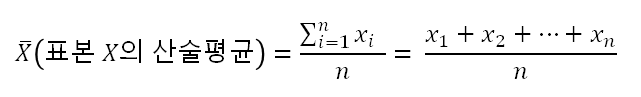

### 1.1.2.기하평균
- 자료들의 곱을 자료수만큼 제곱근한 값
- 즉, n개의 양수가 있을 때, 이들 수의 곱의 n제곱근의 값
- 기하평균은 산술평균보다 크지 않음
- 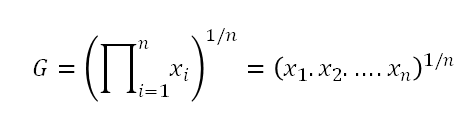

### 1.1.3.조화평균
- n개의 양수에 대하여 그 역수들을 산술평균하고, 이를 다시 역수로 취한 값
- 데이터의 평균적인 변화율이나 업무능률의 평균을 구할 때 사용
- 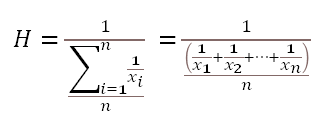

## 1.2.분산과 표준편차
- 산술평균이 갖지 못하는 자료의 산포도를 제공
- 단순히 편차들을 합하면 항상 0의 값을 갖기 때문에 편차를 제곱
- 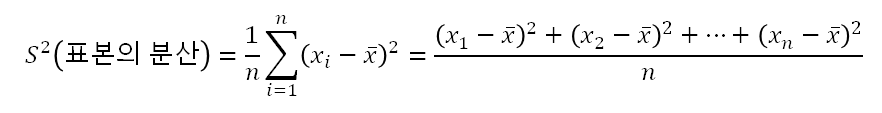
- 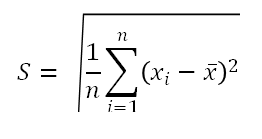

## 1.3.분석 및 해석

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/통계/Ashopping.csv',sep=',',encoding='CP949')
df_1 = df[['할인권_사용 횟수','성별']]
df_1.head()

,할인권_사용 횟수,성별
0,1,1
1,22,1
2,6,1
3,1,1
4,9,0


In [6]:
print(df_1.groupby('성별').mean())
print('-'*50)
print(df_1.groupby('성별').var())
print('-'*50)
print(df_1.groupby('성별').std())

    할인권_사용 횟수
성별           
0   15.986577
1   16.034078
--------------------------------------------------
    할인권_사용 횟수
성별           
0   69.053873
1   69.750602
--------------------------------------------------
    할인권_사용 횟수
성별           
0    8.309866
1    8.351683


- 남성(0)과 여성(1)으로 구분하여 판단해도 큰 차이가 없음
- 30회의 할인쿠폰을 제공하는 쇼핑몰의 입장에서 1년에 16회 이상의 평균적인 할인권 사용 횟수를 보인다는 것은 우수한 성과
- 그러나 성별에 따라 크게 차이를 보이지 않으므로, 성별에 따른 개별적인 할인쿠폰 제공 전략 필요 없음

# 2.왜도와 첨도
- 왜도와 첨도는 산포도의 치우침과 뾰족함을 나타냄
- 산포도의 외형적인 특징을 잘 설명

## 2.1.왜도(Skewness)
- 분포가 왼쪽 또는 오른쪽으로 치우쳐 있는 정도
- 왜도<0: 오른쪽으로 치우침. 왼쪽 꼬리 비대칭 분포
- 왜도>0: 왼쪽으로 치우침. 오른쪽 꼬리 비대칭 분포
- 왜도=0: 치우침이 없음. 평균과 중앙값이 같음
- 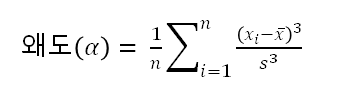
- 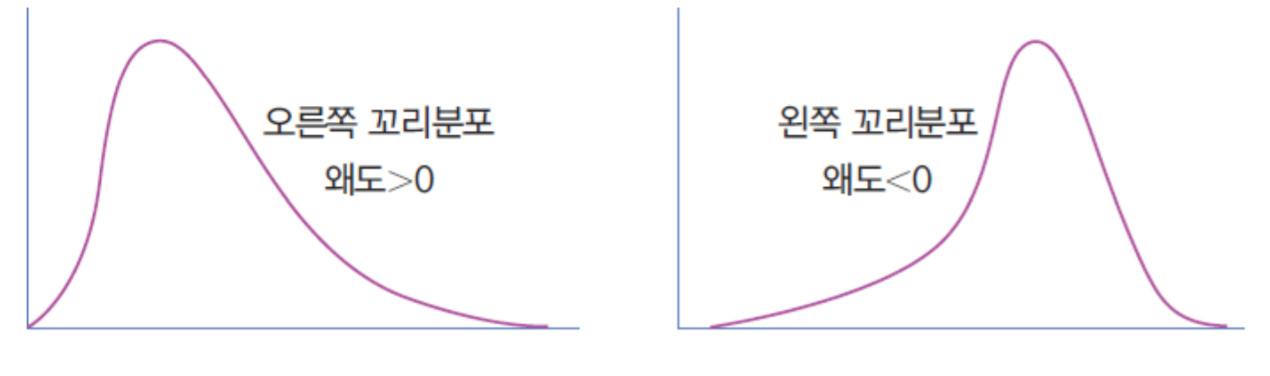

## 2.2.첨도(Kurtosis)
- 분포의 뾰족한 정도를 나타내는 값. 얼마나 평균에 집중되어 있는지 확인 가능
- 첨도>0: 정규분포보다 뾰족. 급첨
- 첨도<0: 정규분포보다 완만. 완첨
- 첨도=0: 정규분포. 중첨
- 표준정규확률변수 Z의 네제곱의 평균이 3이기 때문에 3을 뺌
- -3을 첨도 공식에 나타내지 않을 경우, 첨도의 기준은 0이 아니라 3이 됨
- 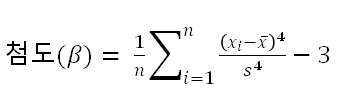
- 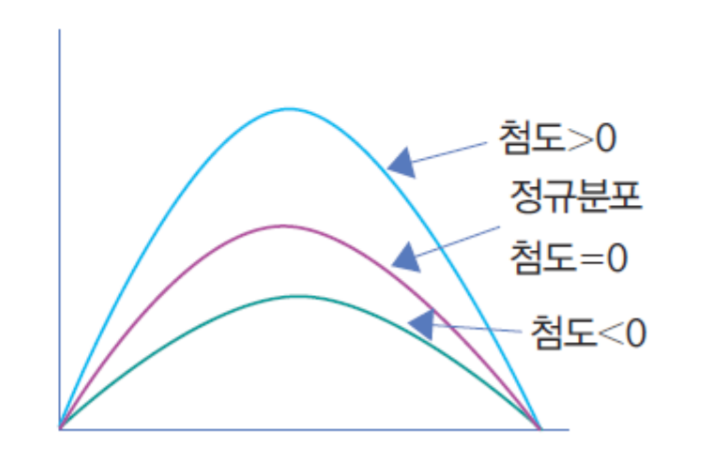

## 2.3.분석 및 해석

In [7]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [8]:
print(df.서비스_만족도.skew())  # 왜도
print(df.서비스_만족도.kurt())  # 첨도

-0.9706614720587393
1.1478245800949547


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


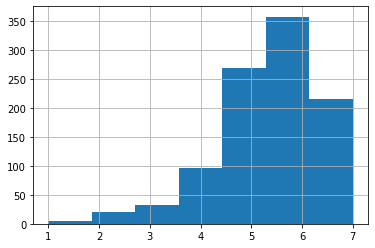

In [9]:
df.서비스_만족도.hist(bins=7)

- 왜도는 음수, 첨도는 양수가 출력
- 오른쪽으로 치우치고, 뾰족한 모양의 히스토그램이 출력
- 쇼핑몰의 고객서비스만족도는 평균 값인 5.54에 비해 다소 높게 평가하는 고객들이 많다는 것을 알 수 있음

#3.기타 기술통계량
- 중앙값, 최빈값, 사분위수

## 3.1.중앙값
- 자료를 크기 순으로 늘어놓았을 때 가장 중앙에 있는 값
- 자료의 개수가 홀수일 때: (자료의 수 + 1) / 2에 위치한 값
  - {1,3,7} 일 때 3
- 자료의 개수가 짝수일 때: 자료의 수 / 2와 (자료의 수 + 2) / 2에 위치한 값의 산술평균값
  - {1,4,6,9} 일 때 5 (4 + 6 / 2)
- 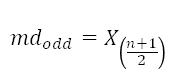
- 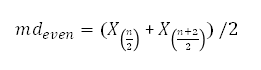


## 3.2.최빈값
- 자료의 집단에서 가장 많이 관측되는 수치
 - {2,3,4,5,6,6}의 경우 최빈값 6
- 하나의 값만 가지는 평균, 분산, 표준편차, 중앙값 등과 다르게 하나 이상의 값을 가질 수 있음
- 모든 자료의 값의 수가 같을 경우 최빈값 존재하지 않음
  - {3,3,3,3} 의 경우 최빈값 X
- 최빈값 2개 분포 = 이봉분포
 - {2,2,3,4,4,5}의 경우 최빈값 2,4
- 최빈값 3개 이상 분포 = 다봉분포
 - {1,1,2,3,3,4,4}의 경우 최빈값 1,3,4

## 3.3.사분위수
- 자료들을 크기 순으로 늘어놓았을 때 누적 백분율을 4등분한 각 점에 위치한 값
- boxplot에서 주로 활용
- 1사분위수(누적백분율 25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
- 제 2사분수 = 중앙값
- 분산, 표준편차처럼 자료의 전반적인 분포의 특성 설명 가능
- 왜도, 첨도처럼 특정 영역에서의 집중성이나 편중성 묘사 가능

## 3.4.분석 및 해석
- 쇼핑몰 고객들의 할인쿠폰 사용빈도는 연 16회 정도의 평균을 보임
- 평균만으로는 의사결정의 신뢰성이 떨어질 수 있음
- 중앙값, 최빈값 같은 기술통계량으로 의사결정의 타당성을 검증

In [10]:
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,구매_카테고리_수,거주지역,성별,고객_나이대,거래기간,할인민감여부,멤버쉽_프로그램_가입전_만족도,멤버쉽_프로그램_가입후_만족도,Recency,Frequency,Monetary,상품_만족도,매장_만족도,서비스_만족도,상품_품질,상품_다양성,가격_적절성,상품_진열_위치,상품_설명_표시,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,6,6,1,4,1079,0,5,7,7,3,4,6,5,6,7,7,6,7.0,6.0,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,4,4,1,1,537,0,2,3,2,3,3,2,5,4,6,7,6,6.0,NaN,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,6,6,1,6,1080,0,6,6,7,3,2,4,6,7,6,7,6,7.0,NaN,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,5,5,1,6,1019,0,3,5,7,3,5,3,5,5,6,6,6,5.0,6.0,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,6,6,0,6,1086,0,5,6,7,6,7,5,6,6,5,6,6,5.0,6.0,5,6,6,6,5,5,6,6,5,6


In [23]:
# 4분위수
print(np.percentile(df['할인권_사용 횟수'],25))
print(np.percentile(df['할인권_사용 횟수'],50))
print(np.percentile(df['할인권_사용 횟수'],75))
print(np.percentile(df['할인권_사용 횟수'],100))
print('-'*50)

#최빈값 출력
print('최빈값:',df['할인권_사용 횟수'].value_counts().idxmax())
print('-'*50)

#기술통계량 출력
print('기술통계량:\n', df['할인권_사용 횟수'].describe())


9.0
17.0
23.0
30.0
--------------------------------------------------
최빈값: 22
--------------------------------------------------
기술통계량:
 count    1000.000000
mean       16.027000
std         8.341334
min         1.000000
25%         9.000000
50%        17.000000
75%        23.000000
max        30.000000
Name: 할인권_사용 횟수, dtype: float64


- 고객들의 할인권 사용 횟수의 최빈값은 22회
- 1사분위는9회, 2사분위는 17회(중앙값과 동일), 3사분위는 23회
- 상위고객으로 갈수록 연간 할인권 사용 횟수는 많이 높아짐